In [7]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy import displacy

In [2]:
!python3 -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 12.8 MB 8.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/danny/git/NetworkAnalysis/witcher_project/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Load lang model
NER = spacy.load("en_core_web_sm")

In [3]:
import os

# Get the books
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>]

In [5]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [6]:
# Visualise identified entities
displacy.render(book_doc[0:2000], style="ent")

In [8]:
char_df = pd.read_csv('~/git/NetworkAnalysis/witcher_project/data/characters.csv', index_col=0)

In [8]:
import re

# Remove brackets and text in brakets
char_df['character']= char_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","", x))
char_df['character_firstname'] = char_df['character'].apply(lambda x: x.split(' ',1)[0])

In [9]:
pd.set_option('display.max_rows', None)
char_df.to_csv('characters_final.csv')

In [10]:
sent_entity_df = []

# Loop over sentence list, store named entity list for each sentence\
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [11]:
sent_entity_df

,sentence,entities
0,"(﻿The, Limits, of, the, Possible, \n, I, \n, ""...",[]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
5,"("", We, have, to, wait, a, bit, longer, ,, "", ...",[]
6,"("", Why, wait, ?, "", snorted, pimply, ,, "", Th...",[]
7,"(Anyone, goes, down, there, ,, that, 's, the, ...",[]
8,"(Have, you, forgotten, how, many, \n, have, di...",[]
9,"(What, are, we, waiting, for, ?, "", \n, "", Thi...",[]


In [12]:
def filter_entity(ent_list:list,char_df:pd.DataFrame):
    return [ent for ent in ent_list
            if ent in list(char_df.character)
            or ent in list(char_df.character_firstname)
            ]

In [13]:
filter_entity(["Geralt", "Thu", "2"], char_df)

['Geralt']

In [14]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, char_df))

# filter out sentences with no character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]

sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [15]:
# Only first names

sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                                for item in x])

/tmp/ipykernel_4110/2048028558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [16]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11309,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11311,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11316,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11317,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


In [17]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    #remove duplicated characters
    char_unique = [char_list[i] for i in range(len(char_list))
                    if (i==0) or char_list[i] != char_list[i-1]]
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [18]:
relationship_df = pd.DataFrame(relationships)

In [19]:
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt
...,...,...
3380,Ciri,Geralt
3381,Geralt,Ciri
3382,Ciri,Geralt
3383,Ciri,Geralt


In [20]:
# Sort duplicated relationships
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1),columns=relationship_df.columns)
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
...,...,...
3380,Ciri,Geralt
3381,Ciri,Geralt
3382,Ciri,Geralt
3383,Ciri,Geralt


In [21]:
relationship_df['value'] = 1
relationship_df = relationship_df.groupby(['source','target'], sort=False, as_index=False).sum()

Now for Visualisation

In [22]:
# Graphs from df
G = nx.from_pandas_edgelist(relationship_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

Network X Graph

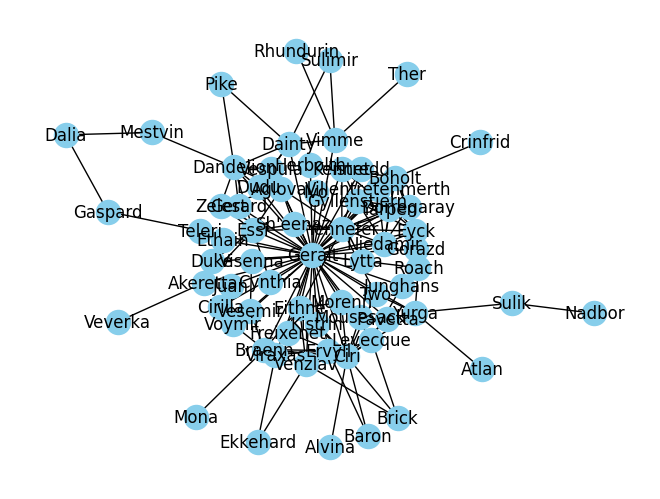

In [23]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Pyvis Visualisation

In [24]:
from pyvis.network import Network
net = Network(notebook= True,cdn_resources='in_line', width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)

# Set up node attributes
nx.set_node_attributes(G, node_degree, "size")

net.from_nx(G)
net.show("Witcher.html")
net.save_graph("witcher.html")

Witcher.html


Most important characters

In [25]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7462686567164178,
 'Niedamir': 0.11940298507462686,
 'Eyck': 0.11940298507462686,
 'Dorregaray': 0.08955223880597014,
 'Yennefer': 0.22388059701492538,
 'Yarpen': 0.1044776119402985,
 'Gyllenstiern': 0.11940298507462686,
 'Boholt': 0.13432835820895522,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.05970149253731343,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.14925373134328357,
 'Pike': 0.029850746268656716,
 'Dainty': 0.1044776119402985,
 'Vespula': 0.04477611940298507,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.029850746268656716,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.014925373134328358,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Agloval': 0.08955223880597014,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Ess

<Axes: >

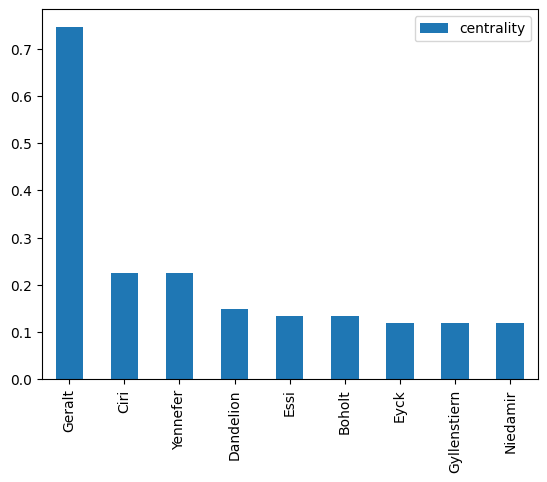

In [26]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=["centrality"])

# Plot top 10 nodes

degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

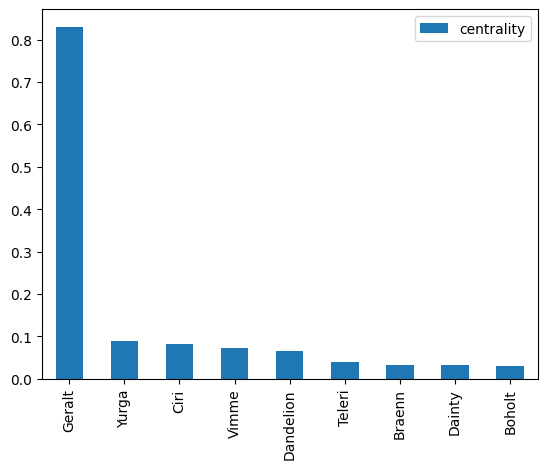

In [27]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=["centrality"])

# Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')


<Axes: >

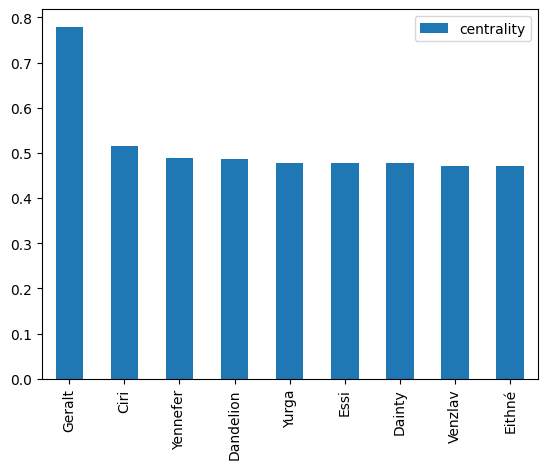

In [28]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=["centrality"])

# Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [29]:
# Save centrality measures
nx.set_node_attributes(G,degree_dict,'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweeneness_centrality')
nx.set_node_attributes(G, closeness_dict,'closeness_centrality')

Community detection

In [30]:
import community as community_louvain

In [31]:
communities = community_louvain.best_partition(G)

In [32]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 2,
 'Dandelion': 3,
 'Pike': 3,
 'Dainty': 3,
 'Vespula': 3,
 'Vimme': 3,
 'Sulimir': 3,
 'Ther': 3,
 'Rhundurin': 3,
 'Dudu': 3,
 "Sh'eenaz": 4,
 'Agloval': 4,
 'Gaspard': 3,
 'Teleri': 3,
 'Dalia': 3,
 'Mestvin': 3,
 'Essi': 4,
 'Gerard': 3,
 'Zelest': 4,
 'Duke': 4,
 'Akeretta': 4,
 'Veverka': 4,
 'Ethain': 0,
 'Juan': 0,
 'Cynthia': 4,
 'Braenn': 0,
 'Ciri': 5,
 'Ervyll': 5,
 'Eithné': 5,
 'Voymir': 0,
 'Kistrin': 5,
 'Alvina': 5,
 'Vesemir': 0,
 'Cirilla': 0,
 'Freixenet': 5,
 'Venzlav': 5,
 'Ekkehard': 5,
 'Viraxas': 5,
 'Morenn': 5,
 'Mona': 0,
 'Pavetta': 5,
 'Baron': 5,
 'Junghans': 5,
 'Brick': 5,
 'Levecque': 5,
 'Mousesack': 5,
 'Yurga': 2,
 'Visenna': 0,
 'Atlan': 2,
 'Lytta': 0,
 'Gorazd': 0,
 'Roach': 2,
 'Nadbor': 2,
 'Sulik': 2}

In [33]:
nx.set_node_attributes(G, communities, 'group')

In [34]:
com_net = Network(notebook = True, height='700px',bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")
com_net.save_graph("witcher_communities.html")

witcher_communities.html


Evolution of character importance

In [1]:
from lib.utils import functions as f
# init empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir("data") if ".txt" in b.name]

# sort dir entries by name
all_books.sort(key=lambda x: x.name)


In [15]:
# Loop through books list and create graphs
for book in all_books:

    book_text = f.ner(book)

    # get list of entities per sentence
    sent_entity_df = f.get_ne_list_per_sentence(book_text)

    # select only char ents
    sent_entity_df['character_entities'] =  sent_entity_df['entity'].apply(lambda x: f.filter_entity(x, char_df))

    # filter out sentence with no char entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]

    # take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                                for item in x])

    # create relationships df
    relationship_df = f.create_relationships(df = sent_entity_df_filtered, window_size=5)

    # create graph from dataframe
    G = nx.from_pandas_edgelist(relationship_df,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
    
    books_graph.append(G)
                                

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/danny/git/NetworkAnalysis/witcher_project/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_12863/3785054548.py", line 10, in <module>
    sent_entity_df['character_entities'] =  sent_entity_df['entity'].apply(lambda x: f.filter_entity(x, char_df))
  File "/home/danny/git/NetworkAnalysis/witcher_project/lib/python3.9/site-packages/pandas/core/series.py", line 4917, in apply
    return SeriesApply(
  File "/home/danny/git/NetworkAnalysis/witcher_project/lib/python3.9/site-packages/pandas/core/apply.py", line 1427, in apply
    return self.apply_standard()
  File "/home/danny/git/NetworkAnalysis/witcher_project/lib/python3.9/site-packages/pandas/core/apply.py", line 1507, in apply_standard
    mapped = obj._map_values(
  File "/home/danny/git/NetworkAnalysis/witcher_project/lib/python3.9/site-packages/pandas/core/base.py", line 

In [14]:
# Creating a list of degree centrality for all books
evol = [nx.degree_centrality(book) for book in books_graph]

# create a df from list of degree centralities in all books
degree_evol_df = pd.DataFrame.from_records(evol)

# plotting the degree centrality evolution of 4 main chars
degree_evol_df[["Geralt","Ciri","Yennefer","Dandelion","Vesemir"]].plot()

KeyError: "None of [Index(['Geralt', 'Ciri', 'Yennefer', 'Dandelion', 'Vesemir'], dtype='object')] are in the [columns]"